In [6]:
%matplotlib inline
initial = 0.9945731984945042
import h5py
import matplotlib.pyplot as plt
import numpy as np
input_file1 = h5py.File('rhOverM_Asymptotic_GeometricUnits104.h5','r')
SXS = input_file1['Extrapolated_N2.dir']['Y_l%i_m%i.dat'%(2,-1)]
t = SXS[:,0]
dt = np.diff(t)


In [8]:
t = SXS[:,0]
sum=t[1:]*0; #initializing the energy
for l in range(2,9):
    for m in range(-l,l+1):
        SXS = input_file1['Extrapolated_N2.dir']['Y_l%i_m%i.dat'%(l,m)]
        #print(l,m)
        t = SXS[:,0] 
        #h_real = SXS[]
        h_real = SXS[:,1]
        h_imag = SXS[:,2]
        H = SXS[:,1]+(0+1j)*SXS[:,2]
        Hdot = np.diff(H)/np.diff(t)
       
        hdot_real = np.diff(h_real)/dt #taking the diffrential 
        hdot_imag = np.diff(h_imag)/dt 
        #sum = sum + hdot_real*hdot_real + hdot_imag*hdot_imag #computing the square of Alm and adding it the energy
        sum = sum + Hdot*np.conj(Hdot)
        print(l,m,sum[-1])


(2, -2, (6.9243909763951556e-14+0j))
(2, -1, (6.9319469276954791e-14+0j))
(2, 0, (6.9871383210184018e-14+0j))
(2, 1, (7.3265323715863847e-14+0j))
(2, 2, (1.4344709186240332e-13+0j))
(3, -3, (1.6496844888838226e-13+0j))
(3, -2, (1.6646608023608536e-13+0j))
(3, -1, (1.6674852903293203e-13+0j))
(3, 0, (1.6742986569359934e-13+0j))
(3, 1, (1.6772647739541089e-13+0j))
(3, 2, (1.6910598103005165e-13+0j))
(3, 3, (2.8665860168729114e-13+0j))
(4, -4, (6.1291369495090814e-12+0j))
(4, -3, (6.1333424942240793e-12+0j))
(4, -2, (6.1335975900042072e-12+0j))
(4, -1, (6.1336146786445408e-12+0j))
(4, 0, (6.1339087723021538e-12+0j))
(4, 1, (6.1339138653589699e-12+0j))
(4, 2, (6.1340323458332824e-12+0j))
(4, 3, (6.1393922813017356e-12+0j))
(4, 4, (1.4904541424975855e-11+0j))
(5, -5, (3.0216774634280141e-11+0j))
(5, -4, (3.0717398780052523e-11+0j))
(5, -3, (3.0738080741628157e-11+0j))
(5, -2, (3.0738225426841667e-11+0j))
(5, -1, (3.0738260998214595e-11+0j))
(5, 0, (3.0738323463915429e-11+0j))
(5, 1, (3.0738

/home/rahul/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


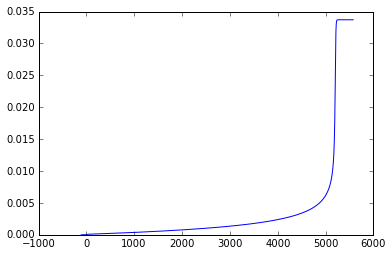

In [9]:
e = np.cumsum(sum*dt)/(16*np.pi) #integrating and dividing by the correct factor
plt.figure(1)
plt.plot(t[1:],e)
plt.show()



In [10]:
Remnant = initial-e[-1] #Subtracting radiated energy from the initial energy
print(Remnant)


(0.960856146497+0j)
